In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1.]]
[[ 0.   0.   1.   1. ]
 [ 0.1  0.1  1.   1. ]
 [ 0.2  0.2  1.   1. ]
 [ 0.3  0.3  1.   1. ]
 [ 0.4  0.4  1.   1. ]
 [ 0.5  0.5  1.   1. ]
 [ 0.6  0.6  1.   1. ]
 [ 0.7  0.

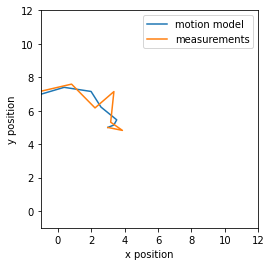

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. ]),
 array([   3.        ,    3.35932084,    3.52938052,    2.58862054,
           1.99576422,    0.38578413,   -1.49234858,   -4.28875423,
          -6.19524349,   -8.05361837,   -9.69844711,  -11.95561195,
         -14.33710404,  -16.5763685 ,  -19.3059986 ,  -22.19867895,
         -24.62922047,  -27.10572741,  -

In [37]:
num_steps = 100
ground_truth_xs = np.linspace(0, 10, num=num_steps + 1) # [0, 1, ..., 10]
ground_truth_ys = ground_truth_xs.copy() # x = y
print(ground_truth_xs)
dx = np.ones((1,101))
dy = dx
print(dx)
ground_truth_states = np.stack((ground_truth_xs,ground_truth_ys, dx[0], dy[0]), axis=1) # ground_truth_states is [[0,0], [1,1], ..., [10,10]]
print(ground_truth_states)

# Simulate motion with our noisy motion model
x_0, y_0, dx, dy = 3, 5, 1, 1 # given initial position at (0,0)
motion_states = [np.array([x_0, y_0, dx, dy])] # a list to store state at each step following noisy motion model
#u_t = np.array([1.0, 1.0]) # given constant control input
A = np.array([[1, 0, 0.9 , 0],
             [0, 1, 0, 0.9],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])
#B = np.array([[1, 0],
#              [0, 1]])
Q = np.array([[0.3, 0, 0.3, 0],
              [0, 0.3, 0, 0.3],
              [0.3, 0, 0.3, 0],
              [0, 0.3, 0, 0.3]]) # given Q matrix

for _ in range(100):
    motion_noise = np.random.multivariate_normal(mean=np.array([0,0,0,0]), cov=Q) # ~N(0,Q)
    pred_state = A @ motion_states[-1] + motion_noise
    #+ B @ u_t + motion_noise # note: a @ b = np.dot(a,b)
    motion_states.append(pred_state)

# Simulate measurements with our noisy measurement model
# In real life, we are supposed to get these directly from our sensor
measurement_states = [np.array([x_0, y_0])] # # a list to store state at each step following noisy measurement model, assume we have perfect initial measurement
H = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]]) # given H matrix
R = np.array([[0.75, 0],
              [0, 0.6]]) # given R matrix
for i in range(100):
    #measurement_noise = np.random.multivariate_normal(mean=np.array([0,0]), cov=R) # ~N(0,R)
    new_measurement = H @ motion_states[i+1] + np.random.multivariate_normal(mean=np.array([0,0]), cov=R) # this is z_t
    measurement_states.append(new_measurement)

    
# Convert motion_states and measurement_states to array so we can plot them easily
motion_states = np.array(motion_states)
measurement_states = np.array(measurement_states)
print("motion states -2",motion_states)
print("motion states -1",motion_states[:,0])
print("measurement states ", measurement_states)
print("measurement_states[:,0]",measurement_states[:,0])
# Compare ground truth and measurements
#plt.plot(ground_truth_states[:,0], ground_truth_states[:,1])
plt.plot(motion_states[:,0], motion_states[:,1])
plt.plot(measurement_states[:,0], measurement_states[:,1])
plt.xlim(-1,12)
plt.ylim(-1,12)
plt.xlabel('x position')
plt.ylabel('y position')
plt.legend(['motion model', 'measurements'])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
ground_truth_states[:,0], motion_states[:,0], measurement_states[:,0]

In [38]:
def predict(A = None , mu_current = None, Sigma_t = None):
    predicted_mu = A @ mu_current
    predicted_Sigma = A @ Sigma_t @ A.T + Q
    Y = np.linalg.inv( predicted_Sigma)
    y = np.dot(Y, predicted_mu)
    return Y, y

In [39]:
def update(H, R, z, Y, y):
    R1 = np.linalg.inv(R)
    H1 = H.transpose()
    I = np.dot((np.dot(H1, R1)), H)
    i = np.dot((np.dot(H1, R1)), z)
    Y = Y + I
    y = y + i
    estimated_Sigma = np.linalg.inv(Y)
    estimated_mu = np.dot(estimated_Sigma, y)
    
    return   estimated_mu,estimated_Sigma

In [40]:
# Re-initialize the problem with the given information
mu_0 = np.array([0, 0, 1, 1])

#u_t = np.array([1, 1]) # we assume constant control input

A = np.array([[1, 0, 0.01 , 0],
             [0, 1, 0, 0.01],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])
#B = np.array([[1, 0],
 #             [0, 1]])
Q = np.array([[0.3, 0, 0.3, 0],
              [0, 0.3, 0, 0.3],
              [0.3, 0, 0.3, 0],
              [0, 0.3, 0, 0.3]])

H = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])

R = np.array([[0.75, 0],
              [0, 0.6]])
Sigma_0 = np.eye(A.shape[1])

# Initialize empty lists to store the filtered states and measurements for plotting
measurement_states = []
filtered_states = []

# Run KF for each time step
mu_current = mu_0.copy()
Sigma_t = Sigma_0.copy()
for i in range(num_steps):
    
    # Predict step
    Y, y = predict(A = A, mu_current = mu_current, Sigma_t = Sigma_t)
    
    # Get measurement (in real life, we get this from our sensor)    
    measurement_noise = np.random.multivariate_normal(mean=np.array([0,0]), cov=R) # ~N(0,R)
    new_measurement = H @ motion_states[i+1] + measurement_noise # this is z_t
    
    # The rest of update step
    mu_current,Sigma_t  = update(H, R, new_measurement, Y, y)
    
    # Store measurements and mu_current so we can plot it later
    measurement_states.append(new_measurement)
    filtered_states.append(mu_current)

# For plotting purposes, convert the lists to array
measurement_states = np.array(measurement_states)
filtered_states = np.array(filtered_states)

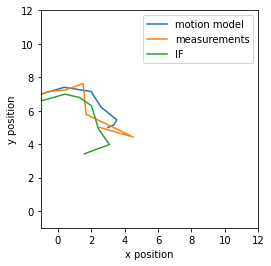

In [41]:
# Let's plot the results

#plt.plot(ground_truth_states[:,0], ground_truth_states[:,1]) # from previous section
plt.plot(motion_states[:,0], motion_states[:,1]) # from previous section
plt.plot(measurement_states[:,0], measurement_states[:,1])
plt.plot(filtered_states[:,0], filtered_states[:,1])
plt.xlim(-1,12)
plt.ylim(-1,12)
plt.xlabel('x position')
plt.ylabel('y position')
plt.legend(['motion model', 'measurements', 'IF'])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()